<a href="https://colab.research.google.com/github/solishiguera/Intro-to-ML/blob/main/Evidencia2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/content/gdrive")  
!pwd

Mounted at /content/gdrive
/content


In [2]:
%cd "/content/gdrive/MyDrive/Colab Notebooks/SEMESTRE_7/Modulo2/Evidencia2"
!ls

/content/gdrive/MyDrive/Colab Notebooks/SEMESTRE_7/Modulo2/Evidencia2
cereal.csv  Evidencia2.ipynb


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from pandas.plotting import scatter_matrix
from plotly.subplots import make_subplots
import plotly.graph_objs as go

# Descripción de datos
* Name: Name of cereal
* mfr: Manufacturer of cereal
  * A = American Home Food Products;
  * G = General Mills
  * K = Kelloggs
  * N = Nabisco
  * P = Post
  * Q = Quaker Oats
  * R = Ralston Purina
* type:
  * cold
  * hot
* calories: calories per serving
* protein: grams of protein
* fat: grams of fat
* sodium: milligrams of sodium
* fiber: grams of dietary fiber
* carbo: grams of complex carbohydrates
* sugars: grams of sugars
* potass: milligrams of potassium
* vitamins: vitamins and minerals - 0, 25, or 100, indicating the typical percentage of FDA recommended
* shelf: display shelf (1, 2, or 3, counting from the floor)
* weight: weight in ounces of one serving
* cups: number of cups in one serving
* rating: a rating of the cereals (Possibly from Consumer Reports?)

In [4]:
df = pd.read_csv('cereal.csv')
df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [5]:
df.shape

(77, 16)

In [10]:
df.isna().sum()

name        0
mfr         0
type        0
calories    0
protein     0
fat         0
sodium      0
fiber       0
carbo       0
sugars      0
potass      0
vitamins    0
shelf       0
weight      0
cups        0
rating      0
dtype: int64

In [9]:
df.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,106.883117,2.545455,1.012987,159.675325,2.151948,14.597403,6.922078,96.077922,28.246753,2.207792,1.029610,0.821039,42.665705
std,19.484119,1.094790,1.006473,83.832295,2.383364,4.278956,4.444885,71.286813,22.342523,0.832524,0.150477,0.232716,14.047289
min,50.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,40.000000,25.000000,1.000000,1.000000,0.670000,33.174094
50%,110.000000,3.000000,1.000000,180.000000,2.000000,14.000000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.400208
75%,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.828392
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000,93.704912


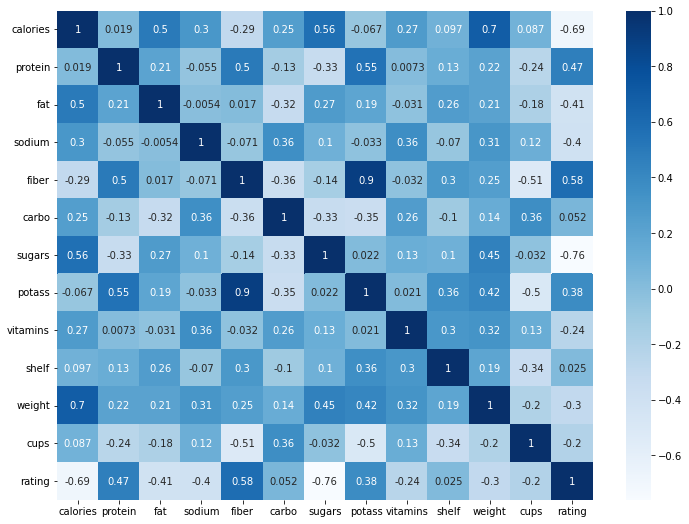

In [13]:
corr_df = df.corr(method='pearson')

plt.figure(figsize=(12, 9))
sns.heatmap(corr_df, annot=True, cmap="Blues")
plt.show()

In [28]:
from sklearn.model_selection import train_test_split
from sklearn import *

# x = df[['protein', 'fat', 'sodium', 'fiber', 'carbo', 'sugars', 'potass', 'vitamins']]
# x = df[['fat', 'sodium', 'sugars', 'weight']]
x = df[['calories','protein', 'fat', 'sodium', 'fiber', 'carbo', 'sugars', 'potass', 'vitamins', 'shelf', 'weight', 'cups']]
# Nuestra varible dependiente
y = df[['rating']]

# Separamos un conjunto de datos para entrenar y otro para probar
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=4)

In [29]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

#Nivel de significancia
alpha = 0.05

# Inicialización de modelos
ridge_mod = Ridge(alpha)
lasso_mod = Lasso(alpha)
forest_reg = RandomForestRegressor()
ml_mod = LinearRegression()

In [30]:
# Training model
ml_mod.fit(X_train,y_train)

# Training predictions
y_train_pred_ml = ml_mod.predict(X_train)

# Model evaluation
r1_ml = metrics.r2_score(y_train, y_train_pred_ml)
print("Score de datos de entrenamiento: " +"{:.6}".format(r1_ml*100)+"%")

# Testing predictions
y_test_pred_ml = ml_mod.predict(X_test)

# Model evaluation
r2_ml = metrics.r2_score(y_test, y_test_pred_ml)
print("Score de datos de prueba: " +"{:.6}".format(r2_ml*100)+"%")

mse_ml = mean_squared_error(y_test,y_test_pred_ml)
print("Error cuadrático medio: " +"{:.6}".format(np.sqrt(mse_ml)))

Score de datos de entrenamiento: 100.0%
Score de datos de prueba: 100.0%
Error cuadrático medio: 3.19764e-07


In [70]:
# Tabla con valores reales y de prediccion
comparison = pd.DataFrame({'Real': df["rating"], 'Predicción': y_test_pred_ml})
muestra = comparison.head(25) # Elegimos 25 valores de muestra
muestra.head(15)


,Real,Predicción
0,68.402973,[68.40297284513747]
1,33.983679,[33.98367906276147]
2,59.425505,[59.42550474272965]
3,93.704912,[93.70491233651083]
4,34.384843,[34.38484320345347]
5,29.509541,[29.509540661883786]
6,33.174094,[33.17409433286163]
7,37.038562,[37.03856183699307]
8,49.120253,[49.12025287084793]
9,53.313813,[53.313812886853846]
